# Part I - (Loan Data from Prosper)
## by (Afnan Abdullah K Alshehri)

## Introduction
> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

## Preliminary Wrangling


In [184]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [185]:
#Load dataset
loan=pd.read_csv(r"C:\Users\HP\.jupyter\prosperLoanData.csv")
pd.set_option("display.max_rows", None,"display.max_columns", None) #show entire dataframe
loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [186]:
loan.isnull().sum()

ListingKey                                  0
ListingNumber                               0
ListingCreationDate                         0
CreditGrade                             84984
Term                                        0
LoanStatus                                  0
ClosedDate                              58848
BorrowerAPR                                25
BorrowerRate                                0
LenderYield                                 0
EstimatedEffectiveYield                 29084
EstimatedLoss                           29084
EstimatedReturn                         29084
ProsperRating (numeric)                 29084
ProsperRating (Alpha)                   29084
ProsperScore                            29084
ListingCategory (numeric)                   0
BorrowerState                            5515
Occupation                               3588
EmploymentStatus                         2255
EmploymentStatusDuration                 7625
IsBorrowerHomeowner               

In [187]:
loan_n=loan[['ListingKey','ListingCreationDate','Term','LoanStatus','BorrowerAPR','ProsperRating (Alpha)',
             'ListingCategory (numeric)','BorrowerState','EmploymentStatus','IsBorrowerHomeowner',
             'OpenCreditLines','IncomeRange','StatedMonthlyIncome','TotalProsperLoans',
             'LoanMonthsSinceOrigination','LoanOriginalAmount','LoanOriginationQuarter',
             'MonthlyLoanPayment','Investors']].copy()

In [188]:
loan_n.head()

,ListingKey,ListingCreationDate,Term,LoanStatus,BorrowerAPR,ProsperRating (Alpha),ListingCategory (numeric),BorrowerState,EmploymentStatus,IsBorrowerHomeowner,OpenCreditLines,IncomeRange,StatedMonthlyIncome,TotalProsperLoans,LoanMonthsSinceOrigination,LoanOriginalAmount,LoanOriginationQuarter,MonthlyLoanPayment,Investors
0,1021339766868145413AB3B,2007-08-26 19:09:29.263000000,36,Completed,0.16516,NaN,0,CO,Self-employed,True,4.0,"$25,000-49,999",3083.333333,NaN,78,9425,Q3 2007,330.43,258
1,10273602499503308B223C1,2014-02-27 08:28:07.900000000,36,Current,0.12016,A,2,CO,Employed,False,14.0,"$50,000-74,999",6125.000000,NaN,0,10000,Q1 2014,318.93,1
2,0EE9337825851032864889A,2007-01-05 15:00:47.090000000,36,Completed,0.28269,NaN,0,GA,Not available,False,NaN,Not displayed,2083.333333,NaN,86,3001,Q1 2007,123.32,41
3,0EF5356002482715299901A,2012-10-22 11:02:35.010000000,36,Current,0.12528,A,16,GA,Employed,True,5.0,"$25,000-49,999",2875.000000,NaN,16,10000,Q4 2012,321.45,158
4,0F023589499656230C5E3E2,2013-09-14 18:38:39.097000000,36,Current,0.24614,D,2,MN,Employed,True,19.0,"$100,000+",9583.333333,1.0,6,15000,Q3 2013,563.97,20


In [189]:
loan_n.shape

(113937, 19)

In [190]:
loan_n.sample(10)

,ListingKey,ListingCreationDate,Term,LoanStatus,BorrowerAPR,ProsperRating (Alpha),ListingCategory (numeric),BorrowerState,EmploymentStatus,IsBorrowerHomeowner,OpenCreditLines,IncomeRange,StatedMonthlyIncome,TotalProsperLoans,LoanMonthsSinceOrigination,LoanOriginalAmount,LoanOriginationQuarter,MonthlyLoanPayment,Investors
75765,7C033601306041319C7B6D6,2014-01-31 14:42:13.940000000,36,Current,0.09434,AA,1,FL,Employed,False,9.0,"$50,000-74,999",4583.333333,NaN,1,15000,Q1 2014,470.67,1
85583,4F573587665343589DD5917,2013-09-07 09:52:31.880000000,36,Past Due (61-90 days),0.17601,B,3,TX,Employed,True,13.0,"$50,000-74,999",5416.666667,2.0,5,15000,Q4 2013,512.59,1
80185,CEEA3408263030808942908,2007-12-15 10:50:35.270000000,36,Completed,0.07469,NaN,1,WA,Full-time,True,16.0,"$100,000+",8333.333333,NaN,75,3000,Q4 2007,92.34,115
108227,E3B23378355908760696787,2006-12-26 14:42:20.433000000,36,Completed,0.22248,NaN,0,MI,Not available,False,NaN,Not displayed,2816.666667,NaN,86,1500,Q1 2007,43.99,49
20559,BCD935166462043806A6F22,2011-06-04 19:10:26.457000000,36,Chargedoff,0.22362,C,1,CA,Full-time,False,8.0,"$50,000-74,999",4166.666667,1.0,33,5000,Q2 2011,183.25,34
110205,82B23472202052757300F47,2010-01-05 18:57:57.053000000,36,Completed,0.10436,A,1,NC,Full-time,True,11.0,"$50,000-74,999",5083.333333,NaN,50,5000,Q1 2010,157.49,123
40766,7AEF3570852372317141E3B,2013-02-20 10:31:41.383000000,60,Current,0.33040,E,1,IL,Employed,False,17.0,"$50,000-74,999",4833.333333,1.0,10,4000,Q2 2013,130.20,22
93784,BBFE3513449501325FF1B56,2011-04-15 08:30:48.210000000,36,Completed,0.10375,A,1,GA,Employed,False,5.0,"$50,000-74,999",4250.000000,3.0,34,13100,Q2 2011,412.26,296
78328,87253366239307565251A9C,2006-06-24 13:43:39.680000000,36,Defaulted,0.19730,NaN,0,NaN,NaN,True,NaN,Not displayed,5416.666667,NaN,92,10001,Q3 2006,366.60,88
7578,5B9533647189373072AFCA5,2006-07-08 09:53:16.153000000,36,Completed,0.08684,NaN,0,TX,NaN,True,NaN,Not displayed,8625.000000,NaN,92,2500,Q3 2006,78.34,30


In [191]:
loan_n.describe()

,Term,BorrowerAPR,ListingCategory (numeric),OpenCreditLines,StatedMonthlyIncome,TotalProsperLoans,LoanMonthsSinceOrigination,LoanOriginalAmount,MonthlyLoanPayment,Investors
count,113937.000000,113912.000000,113937.000000,106333.000000,1.139370e+05,22085.000000,113937.000000,113937.00000,113937.000000,113937.000000
mean,40.830248,0.218828,2.774209,9.260164,5.608026e+03,1.421100,31.896882,8337.01385,272.475783,80.475228
std,10.436212,0.080364,3.996797,5.022644,7.478497e+03,0.764042,29.974184,6245.80058,192.697812,103.239020
min,12.000000,0.006530,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1000.00000,0.000000,1.000000
25%,36.000000,0.156290,1.000000,6.000000,3.200333e+03,1.000000,6.000000,4000.00000,131.620000,2.000000
50%,36.000000,0.209760,1.000000,9.000000,4.666667e+03,1.000000,21.000000,6500.00000,217.740000,44.000000
75%,36.000000,0.283810,3.000000,12.000000,6.825000e+03,2.000000,65.000000,12000.00000,371.580000,115.000000
max,60.000000,0.512290,20.000000,54.000000,1.750003e+06,8.000000,100.000000,35000.00000,2251.510000,1189.000000


In [192]:
loan_n.isnull().sum()

ListingKey                        0
ListingCreationDate               0
Term                              0
LoanStatus                        0
BorrowerAPR                      25
ProsperRating (Alpha)         29084
ListingCategory (numeric)         0
BorrowerState                  5515
EmploymentStatus               2255
IsBorrowerHomeowner               0
OpenCreditLines                7604
IncomeRange                       0
StatedMonthlyIncome               0
TotalProsperLoans             91852
LoanMonthsSinceOrigination        0
LoanOriginalAmount                0
LoanOriginationQuarter            0
MonthlyLoanPayment                0
Investors                         0
dtype: int64

In [193]:
loan_n.ListingKey.duplicated().sum()

871

In [194]:
loan_n.drop_duplicates(subset = 'ListingKey', inplace = True)

In [195]:
loan_n.duplicated().sum()

0

In [196]:
loan_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113066 entries, 0 to 113936
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ListingKey                  113066 non-null  object 
 1   ListingCreationDate         113066 non-null  object 
 2   Term                        113066 non-null  int64  
 3   LoanStatus                  113066 non-null  object 
 4   BorrowerAPR                 113041 non-null  float64
 5   ProsperRating (Alpha)       83982 non-null   object 
 6   ListingCategory (numeric)   113066 non-null  int64  
 7   BorrowerState               107551 non-null  object 
 8   EmploymentStatus            110811 non-null  object 
 9   IsBorrowerHomeowner         113066 non-null  bool   
 10  OpenCreditLines             105462 non-null  float64
 11  IncomeRange                 113066 non-null  object 
 12  StatedMonthlyIncome         113066 non-null  float64
 13  TotalProsperLo

In [197]:
#change object type in dates to to datatype
def dates(x):
    loan_n[x]=pd.to_datetime(loan[x])
dates('ListingCreationDate')

In [198]:
#fill nulls values with 0
def nulls_i(x):
    loan[x]=loan_n[x].fillna(0, inplace=True)
nulls_i('OpenCreditLines')
nulls_i('TotalProsperLoans')
nulls_i('BorrowerAPR')

In [199]:
def integers(x):
    loan_n[x]=loan_n[x].astype('int')  
integers('OpenCreditLines')
integers('TotalProsperLoans')

In [200]:
past_due=loan_n['LoanStatus'].str.contains("Past Due")

loan_n.loc[past_due,'LoanStatus']='Past Due'

In [201]:
#loan_n['ProsperRating (Alpha)'] = loan_n['ProsperRating (Alpha)'].fillna('Not Available')
loan_n['BorrowerState'] = loan_n['BorrowerState'].fillna('N/A')
loan_n.isnull().sum()

ListingKey                        0
ListingCreationDate               0
Term                              0
LoanStatus                        0
BorrowerAPR                       0
ProsperRating (Alpha)         29084
ListingCategory (numeric)         0
BorrowerState                     0
EmploymentStatus               2255
IsBorrowerHomeowner               0
OpenCreditLines                   0
IncomeRange                       0
StatedMonthlyIncome               0
TotalProsperLoans                 0
LoanMonthsSinceOrigination        0
LoanOriginalAmount                0
LoanOriginationQuarter            0
MonthlyLoanPayment                0
Investors                         0
dtype: int64

In [202]:
#Change labels in Listing Category from numbers to clear list
labels={0:'Not Available', 1:'Debt Consolidation',2:'Home Improvement',3:'Business',4:'Personal Loan',
        5:'Student Use',6:'Auto',7:'Other',8:'Baby&Adoption',9:'Boat',10:'Cosmetic Procedure',
        11:'Engagement Ring',12:'Green Loans',13:'Household Expenses',14:'Large Purchases',
        15:'Medical/Dental',16:'Motorcycle',17:'RV',18:'Taxes',19:'Vacation',20:'Wedding Loans'}
def Listing_Category(x):
    if x in list(labels.keys()):
        return (labels[x])
    else:
        return ('Not found')

    
loan_n['ListingCategory (numeric)']=loan_n['ListingCategory (numeric)'].apply(Listing_Category)

In [203]:
def category(x):
    loan_n[x]=loan_n[x].astype('category') 
category('Term')    
category('LoanStatus')
category('ListingCategory (numeric)')
category('ProsperRating (Alpha)')    
category('BorrowerState') 
category('EmploymentStatus')  
category('IncomeRange')

In [204]:
loan_n.rename(columns={'ListingKey':'Listing Key','ListingCreationDate':'Listing Creation Date','LoanStatus':'Loan Status',
                       'BorrowerAPR':'Borrower APR','ProsperRating (Alpha)':'Prosper Rating','ListingCategory (numeric)':'Listing Category',
                       'BorrowerState':'Borrower State','EmploymentStatus':'Employment Status',
                       'IsBorrowerHomeowner':'Is Borrower Homeowner','OpenCreditLines':'Open Credit Lines','IncomeRange':'Income Range',
                       'StatedMonthlyIncome':'Stated Monthly Income','TotalProsperLoans':'Total Prosper Loans',
                       'LoanMonthsSinceOrigination':'Loan Months Since Origination','LoanOriginalAmount':'Loan Original Amount',
                       'LoanOriginationQuarter':'Loan Origination Quarter','MonthlyLoanPayment':'Monthly Loan Payment'},inplace=True)

In [205]:
loan_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113066 entries, 0 to 113936
Data columns (total 19 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Listing Key                    113066 non-null  object        
 1   Listing Creation Date          113066 non-null  datetime64[ns]
 2   Term                           113066 non-null  category      
 3   Loan Status                    113066 non-null  category      
 4   Borrower APR                   113066 non-null  float64       
 5   Prosper Rating                 83982 non-null   category      
 6   Listing Category               113066 non-null  category      
 7   Borrower State                 113066 non-null  category      
 8   Employment Status              110811 non-null  category      
 9   Is Borrower Homeowner          113066 non-null  bool          
 10  Open Credit Lines              113066 non-null  int32         
 11  

### What is the structure of your dataset?

> There are 113937 of rows and 19 of columns ,most of the variables are numeric, and some of them categorical variables.

### What is/are the main feature(s) of interest in your dataset?

> I would like to discover what are the major features for predicting the borrower annual percentage rate of loan in the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think the Term,Loan Status,Borrower APR,Prosper Rating,Listing Category,Borrower State,Employment Status,Income Range,Loan Original Amount,Monthly Loan Payment,Investors the most helpful features to help my go through the investigation part in our dataset

## Univariate Exploration

### Q1: What is distribution of Borrower Annual Percentage Rate?

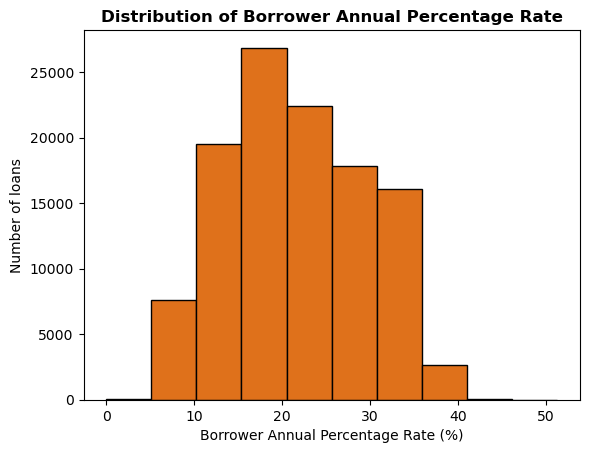

In [206]:
loan_n['BorrowerAPR_percent']=loan_n['Borrower APR'].mul(100)
plt.hist(data=loan_n,x='BorrowerAPR_percent',color='#DF711B',edgecolor='black')
#plt.xscale('log')
plt.xlabel('Borrower Annual Percentage Rate (%)')
plt.ylabel('Number of loans')
plt.title(f'Distribution of Borrower Annual Percentage Rate',weight='bold');

#### The most percentage in Borrower Annual Percentage Rate is 20`%`

### Q2: What is the most length of the loan expressed in months?

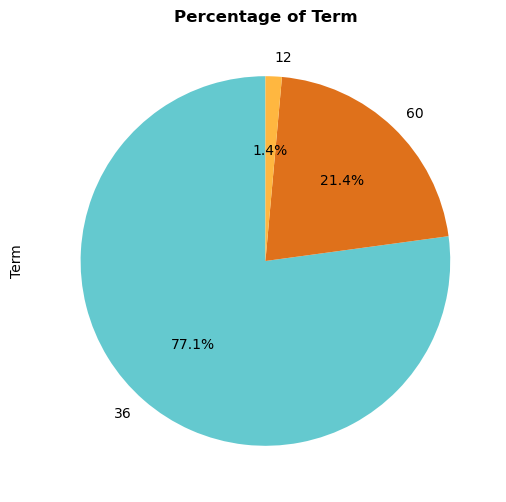

In [207]:
def piePlot(x):
    c=['#64C9CF','#DF711B','#FFB740']
    loan_n[x].value_counts(normalize=True).mul(100).plot.pie(colors=c,figsize=(8,6),
    autopct='%1.1f%%',startangle=90);
    plt.title(f'Percentage of {x}',weight='bold');
    
    
piePlot('Term');

#### The most length of the loan is 36 months with 77%

### Q3: What is the most status of the loan?

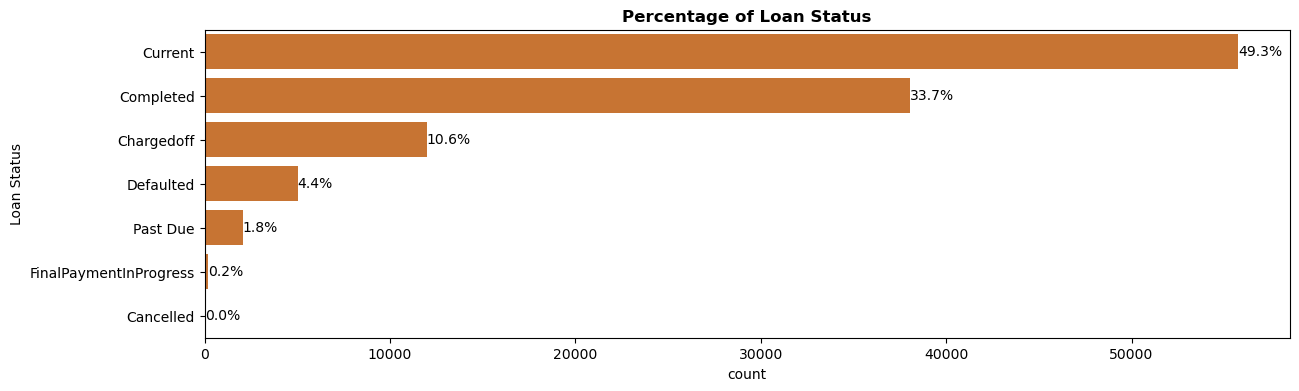

In [208]:
def bar_h(x):
    
    plt.figure(figsize=[14,4])
    order1=loan_n[x].value_counts().index
    sb.countplot(data=loan_n,y=x,color='#DF711B',order=order1)
    plt.title(f'Percentage of {x}',weight='bold')
    
    count_x=loan_n[x].value_counts()
    n_x=loan_n[x].value_counts().sum()
    for i in range(count_x.shape[0]):  ##عدد الانواع
        count=count_x[i]
        per='{:0.1f}%'.format(count*100/n_x)
        plt.text(count+1,i,per,va='center')

bar_h('Loan Status')

#### The most status of the loan is Current with 49%

### Q4: What is the most employment status of the borrower?

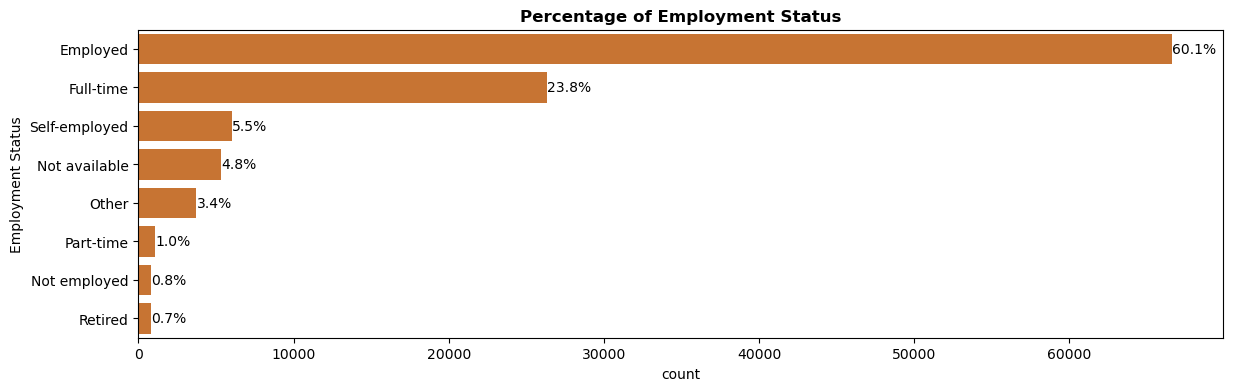

In [209]:
bar_h('Employment Status')

#### The most employment status of the borrowers is employed with 60% then full-time with 23% 

### Q5: What is the category of the listing that the borrower selected?

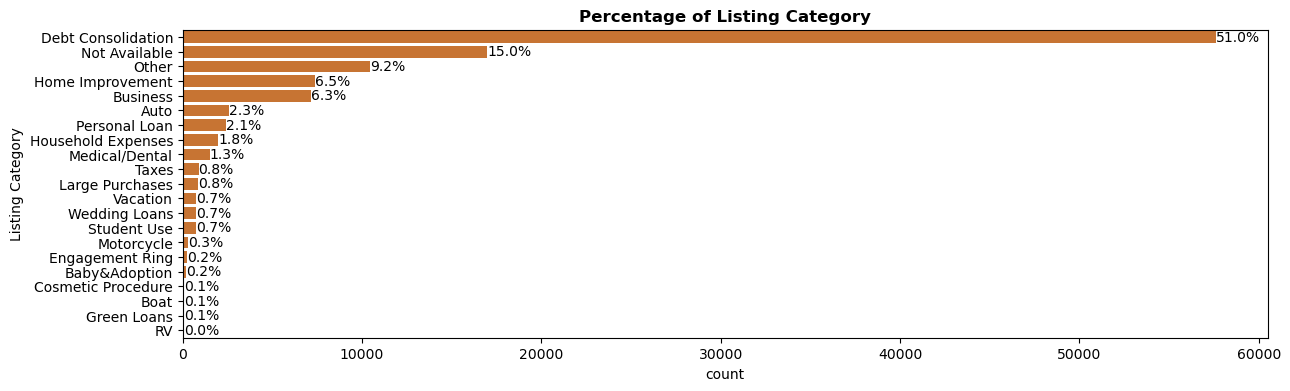

In [210]:
bar_h('Listing Category')

#### 50% of category of the listing that the borrower selected is Debt Consolidation

### Q6: What is most number of investors?

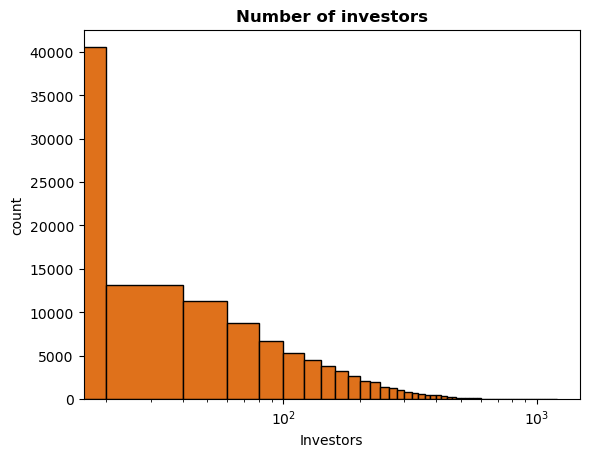

In [211]:
#plt.figure(figsize=[14,4])
bins=np.arange(0,loan_n['Investors'].max()+20,20)
plt.hist(data=loan_n,x='Investors',bins=bins,color='#DF711B',edgecolor='black')
plt.xscale('log')
plt.xlabel('Investors')
plt.ylabel('count')
plt.title(f'Number of investors',weight='bold');

#### Most investors under 100

### Q7: What is percentage of borrower homeowner?

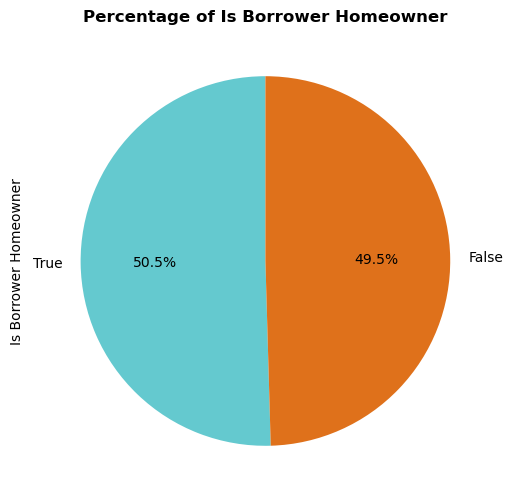

In [212]:
piePlot('Is Borrower Homeowner')

#### 50% are borrowers homeowner and 50% are borrowers not homeowner

### Q8: What is the most income range of the borrowers?

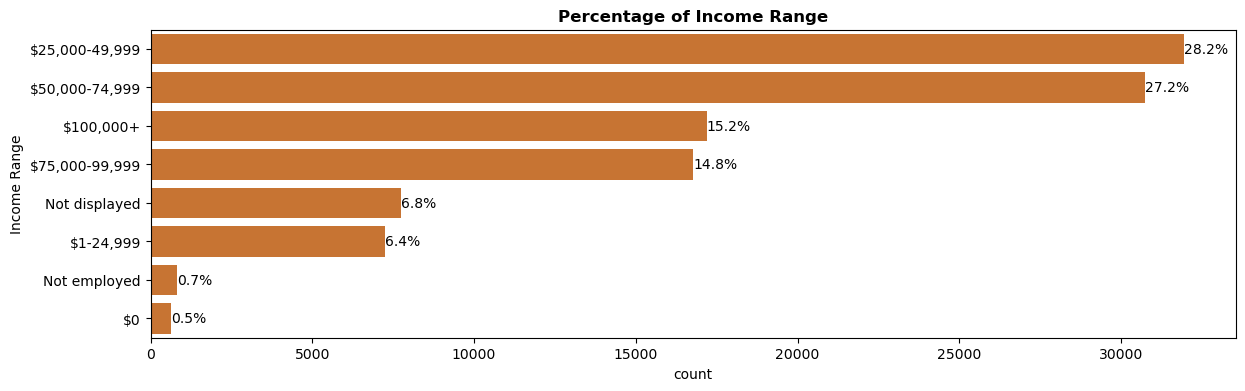

In [213]:
bar_h('Income Range')

#### The most income range is 25,000-49,999 with 28% then 50,000-74,999 with 27%

### Q9: What is loan original amount?

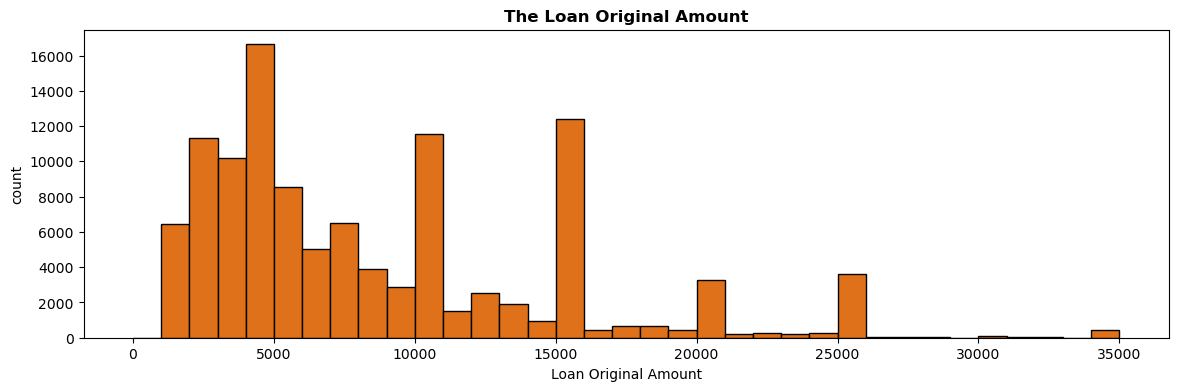

In [214]:
bins=np.arange(0,loan_n['Loan Original Amount'].max()+1000,1000)
plt.figure(figsize=[14,4])
plt.hist(data=loan_n,x='Loan Original Amount',color='#DF711B',bins=bins,edgecolor='black')
plt.xlabel('Loan Original Amount')
plt.ylabel('count')
plt.title('The Loan Original Amount',weight='bold');

#### The most loan original amount is 5.000 then 15.000 and 10.000

### Q10: What is the Monthly Loan Payment?

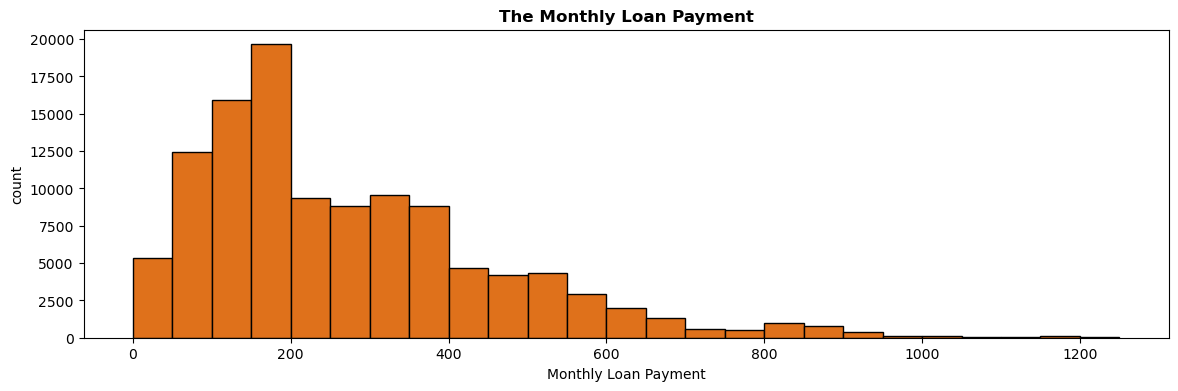

In [215]:
plt.figure(figsize=[14,4])
bins=np.arange(0,loan_n['Monthly Loan Payment'].max()-1000,50)
plt.hist(data=loan_n,x='Monthly Loan Payment',color='#DF711B',bins=bins,edgecolor='black')
plt.xlabel('Monthly Loan Payment')
plt.ylabel('count')
plt.title('The Monthly Loan Payment',weight='bold');

#### The most monthly loan payment between is `$` 100 and `$`400

### Q11: What is most quarter in which the loan was originated?

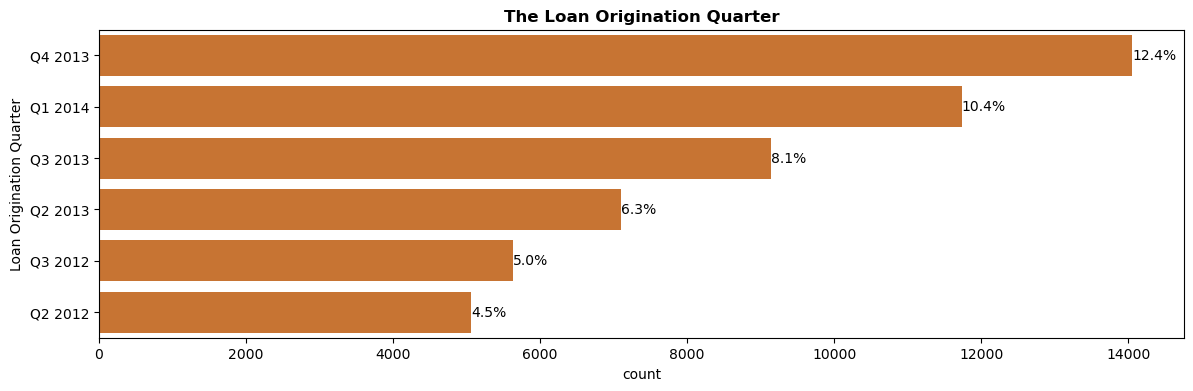

In [216]:
    plt.figure(figsize=[14,4])
    order1=loan_n['Loan Origination Quarter'].value_counts()[0:6].index
    sb.countplot(data=loan_n,y='Loan Origination Quarter',color='#DF711B',order=order1)
    plt.title('The Loan Origination Quarter',weight='bold')
    
    count_x=loan_n['Loan Origination Quarter'].value_counts()[0:6]
    n_x=loan_n['Loan Origination Quarter'].value_counts().sum()
    for i in range(count_x.shape[0]):
        count=count_x[i]
        per='{:0.1f}%'.format(count*100/n_x)
        plt.text(count+1,i,per,va='center')

#### The most quarter is the fourth quarter of 2013 with 12.4%, then the first quarter of 2014 with 10.4% .

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> There is the tranformation of this Borrower APR into the form of percentage.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> In Investors I performed log transformation to take a closer look at the data.

## Bivariate Exploration

### Q12: What is relationship between the loan original amount and Borrower Annual Percentage Rate?

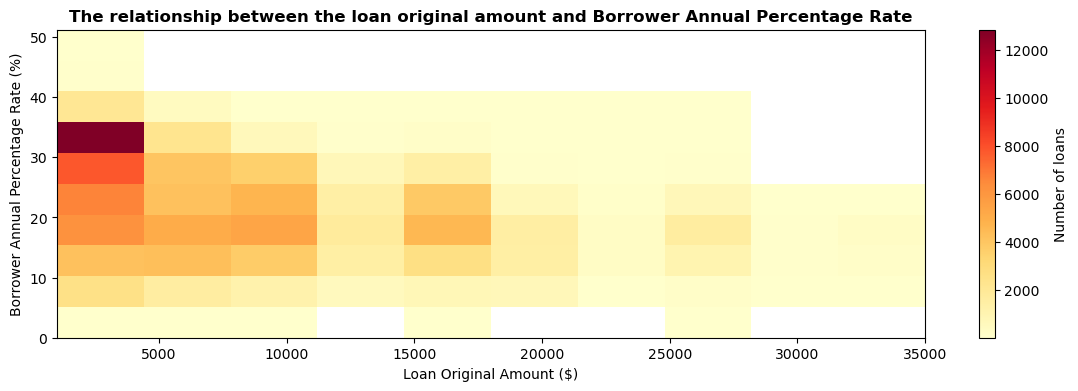

In [217]:
plt.figure(figsize=[14,4])
x_bins=np.arange(1000,loan_n['Loan Original Amount'].max()+2000,2000)
y_bins=np.arange(loan_n['BorrowerAPR_percent'].min(),loan_n['BorrowerAPR_percent'].max()+0.5,0.5)
h2d=plt.hist2d(data = loan_n, x ='Loan Original Amount', y ='BorrowerAPR_percent', cmin=0.5, cmap='YlOrRd')
plt.colorbar(label = 'Number of loans')
plt.title('The relationship between the loan original amount and Borrower Annual Percentage Rate',weight='bold')
plt.xlabel('Loan Original Amount ($)')
plt.ylabel('Borrower Annual Percentage Rate (%)');

#### We find that the lower the loan amount, the higher the Borrower Annual Percentage Rate

### Q13:What is the relationship between the loan original amount and number of investors?

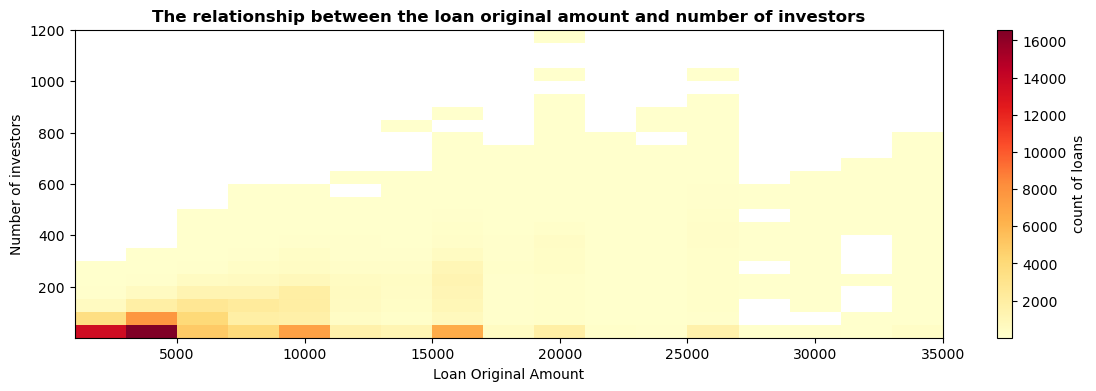

In [218]:
plt.figure(figsize=[14,4])
x_bins=np.arange(1000,loan_n['Loan Original Amount'].max()+2000,2000)
y_bins=np.arange(1,loan_n['Investors'].max()+50,50)
h2d=plt.hist2d(data = loan_n, x ='Loan Original Amount', y ='Investors', cmin=0.5, cmap='YlOrRd',bins=[x_bins,y_bins])
plt.colorbar(label = 'count of loans')
plt.title('The relationship between the loan original amount and number of investors',weight='bold')
plt.xlabel('Loan Original Amount')
plt.ylabel('Number of investors');

#### The most loan original amount less than of 5000`$` with less than 100 investors.

### Q14: What is the relationship between the income range and loan original amount?

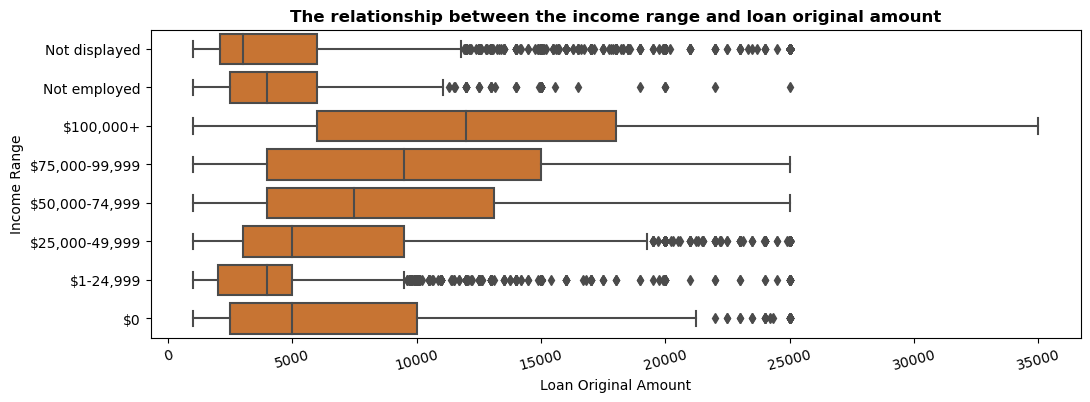

In [219]:
plt.figure(figsize=[12,4])
order_b=['Not displayed','Not employed','$100,000+','$75,000-99,999','$50,000-74,999','$25,000-49,999','$1-24,999','$0']
sb.boxplot(data = loan_n, x = 'Loan Original Amount', y ='Income Range' ,color = '#DF711B',order=order_b);
plt.title('The relationship between the income range and loan original amount', weight='bold')
plt.xticks(rotation=15);

#### We find that the higher the range income, the higher the loan amount.
#### People with low incomes and those who have no income cannot borrow loans in high amounts.

### Q15: What is the realationship between employment status and term

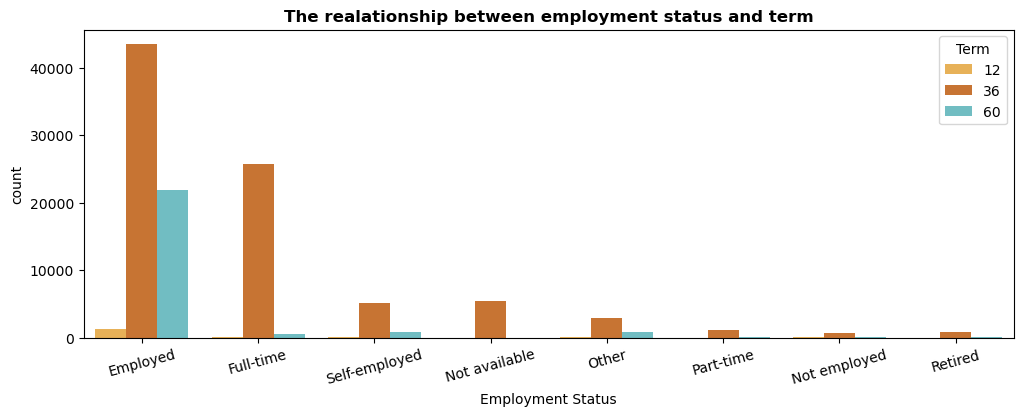

In [220]:
plt.figure(figsize=[12,4])
order_c=loan_n['Employment Status'].value_counts().index
sb.countplot(data = loan_n, x = 'Employment Status', hue = 'Term',
             palette=['#FFB740','#DF711B','#64C9CF'],order=order_c)
plt.title('The realationship between employment status and term',weight='bold')
plt.xticks(rotation=15);

#### We find that the 36 term is the most frequent, and we find that most of the borrowers are employed in the 36 term.

## Q16: What is the number of total prosper loans for each borrower state?

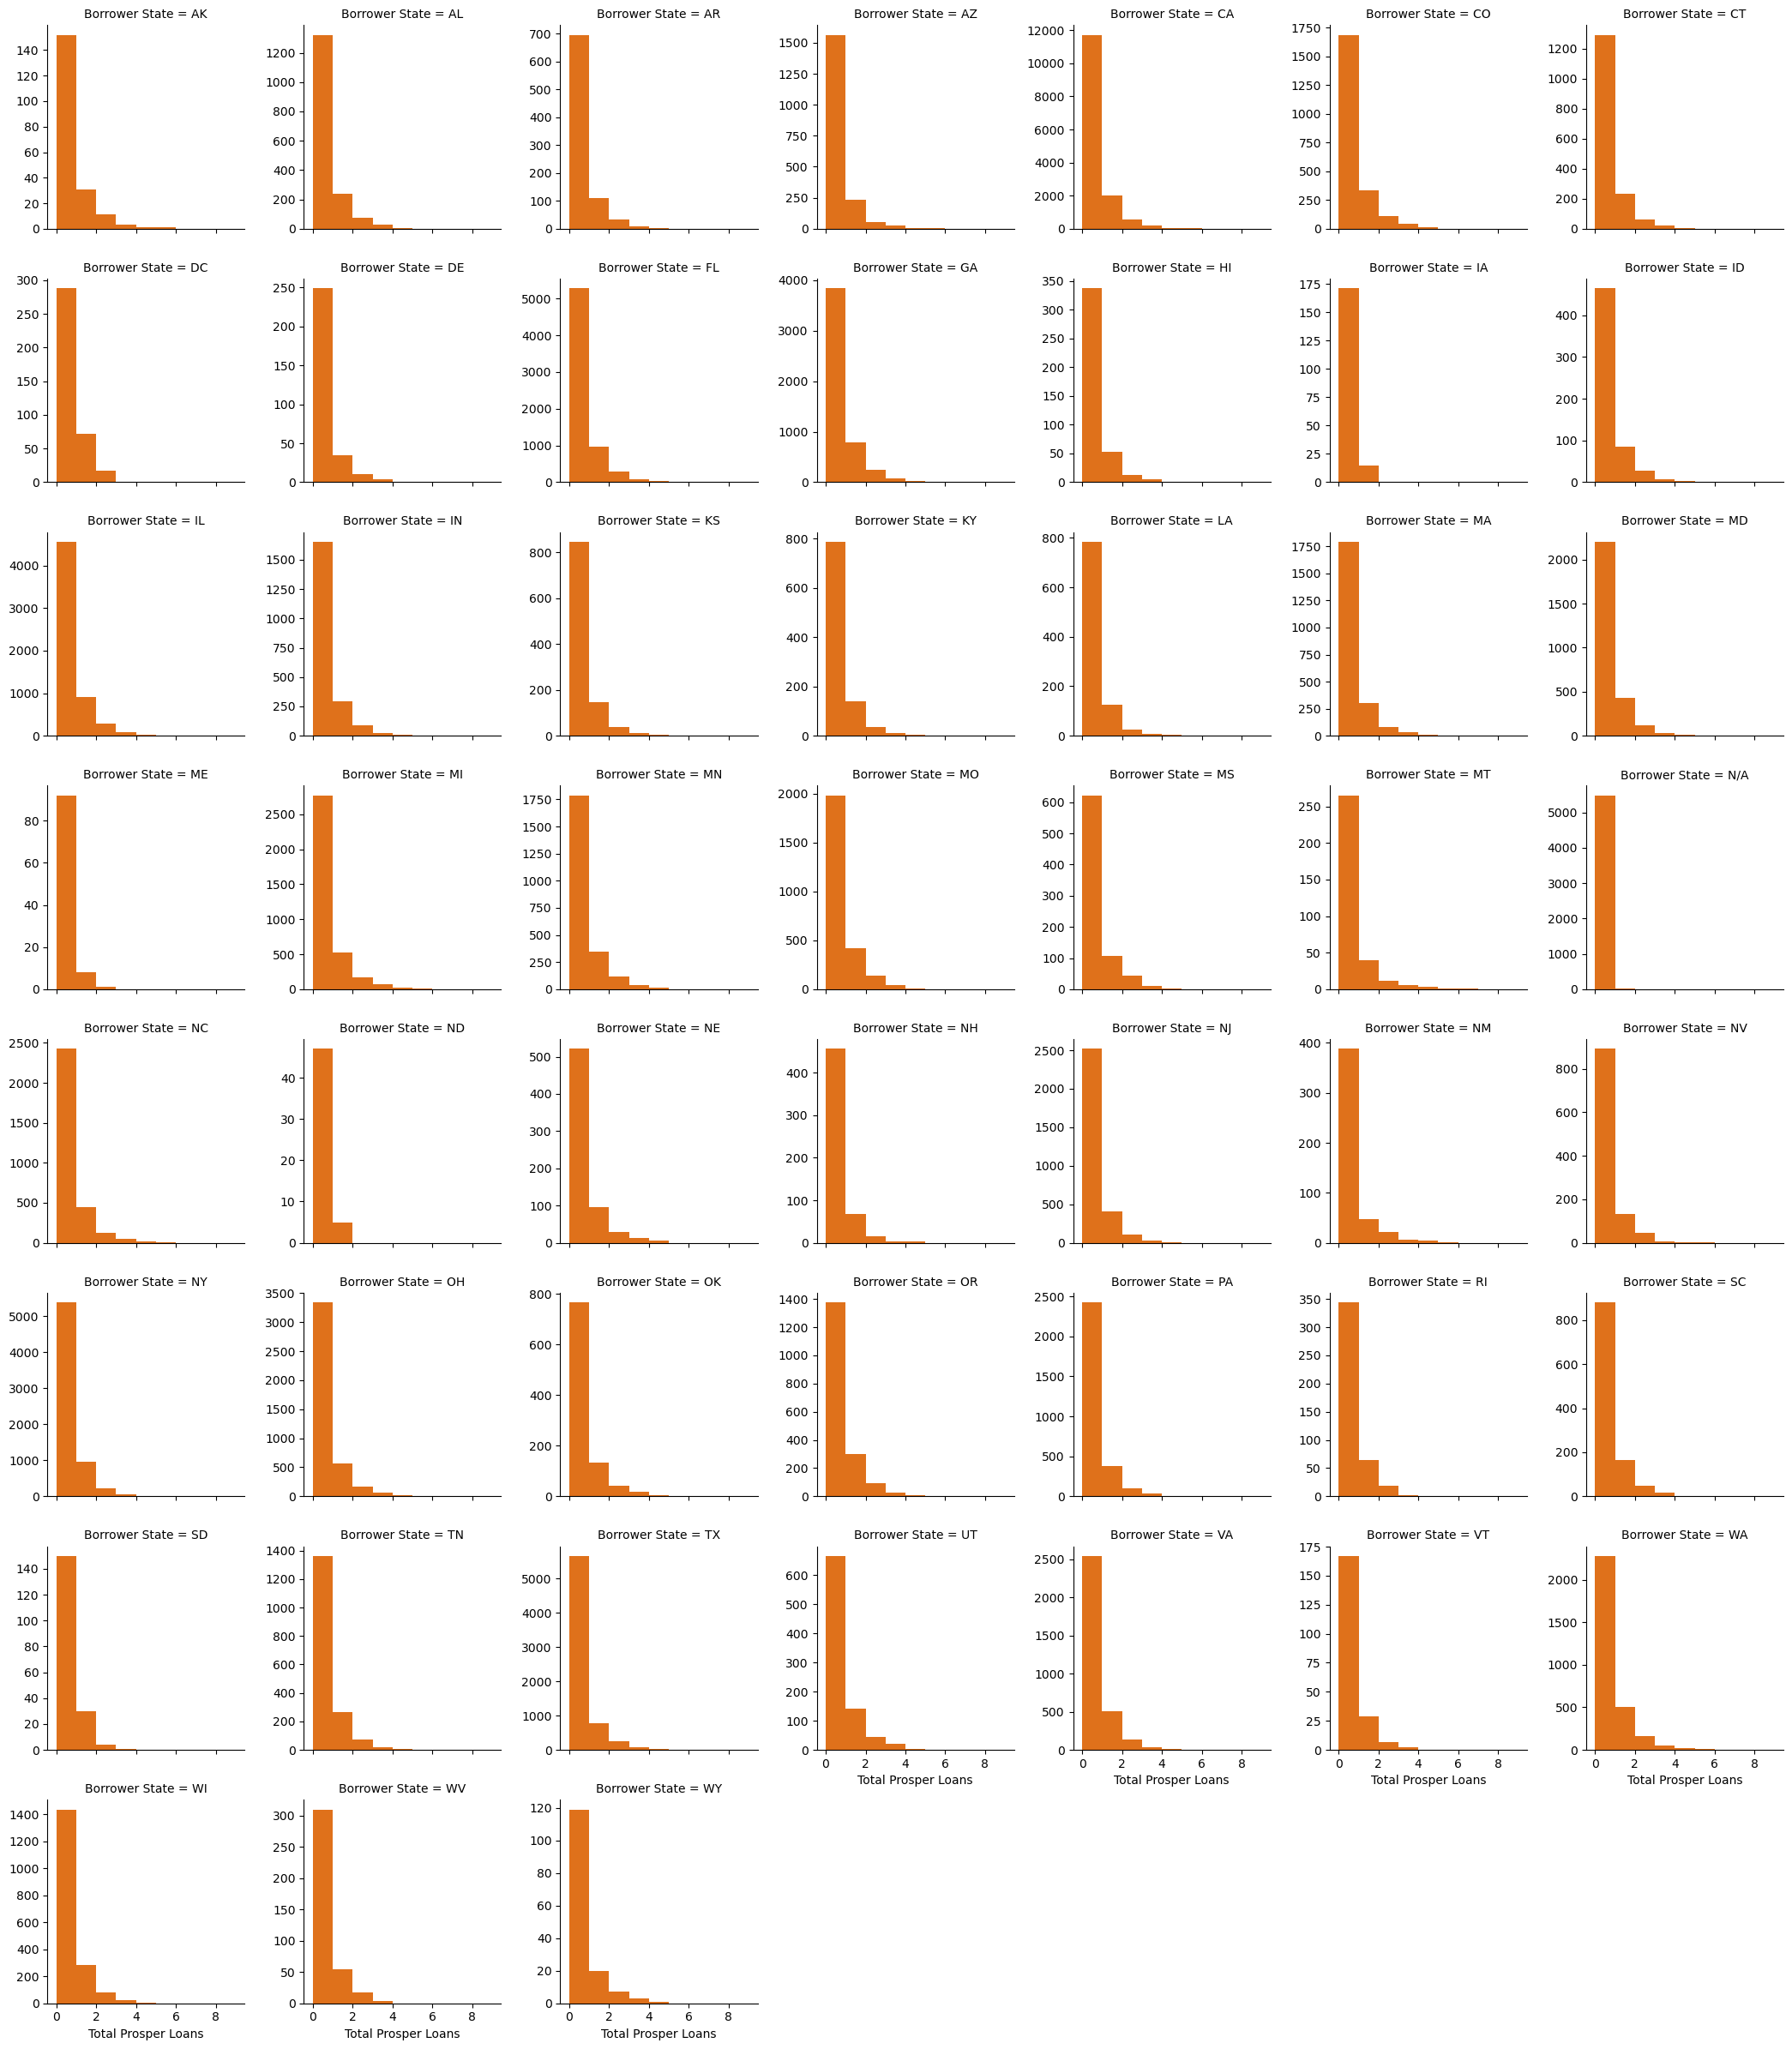

In [221]:
bins_edge=np.arange(0, loan_n['Total Prosper Loans'].max()+2,1)
g = sb.FacetGrid(data = loan_n, col = 'Borrower State', col_wrap=7, sharey=False)
g.map(plt.hist, "Total Prosper Loans",bins=bins_edge,color='#DF711B');

#### Most states don't have any loans before this time

### Q17: What is the relationship between open credit lines and employment status?

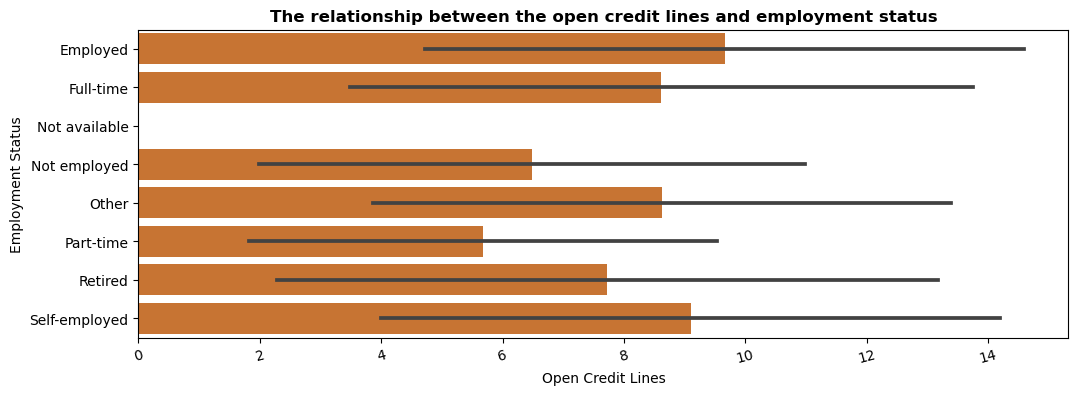

In [222]:
plt.figure(figsize=[12,4])
sb.barplot(data = loan_n, x = 'Open Credit Lines', y ='Employment Status' ,color = '#DF711B',ci='sd')
plt.title('The relationship between the open credit lines and employment status', weight='bold')
plt.xticks(rotation=15);

#### We find the height values in open credit lines are for employed and self-employed

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> In the relationship between the loan original amount and Borrower Annual Percentage Rate We find that the lower the loan amount, the higher the borrower APR.

> In the relationship between the income range and loan original amount We find that the higher the range income, the higher the loan amount.
People with low incomes and those who have no income cannot borrow loans in high amounts.

> In the relationship between employment status and term We find that the 36 term is the most frequent, and we find that most of the borrowers are employed in the 36 term.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> In the relationship between total prosper loans for each borrower state we find most states don't have any loans before this time

> In the relationship between open credit lines and employment status We find the height values in open credit lines are for employed and self-employed

## Multivariate Exploration

### Q18:What is Loan Original Amount and Borrower Annual Percentage Rate across Term?

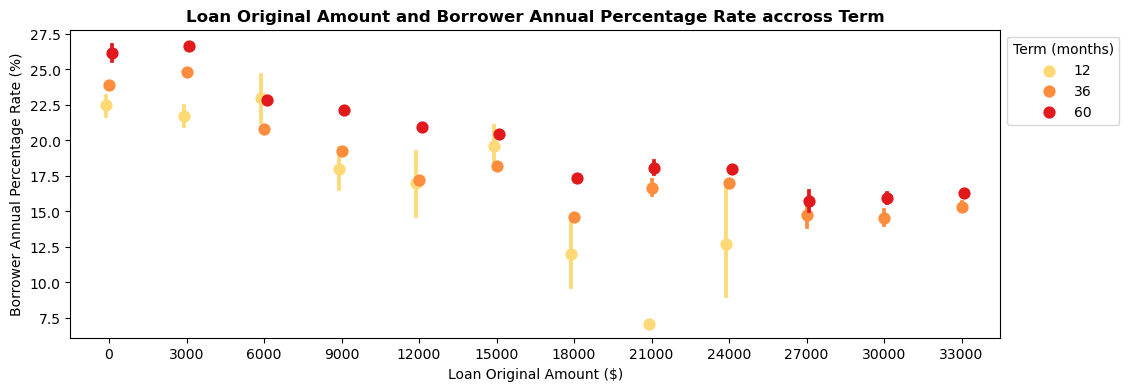

In [223]:
loan_n['Loan Amount']=((loan_n['Loan Original Amount']//3000)*3000)
loan_n['Loan Amount'].value_counts().sort_index()

plt.figure(figsize = [12, 4])
ax=sb.pointplot(data=loan_n,x='Loan Amount',y = 'BorrowerAPR_percent' ,hue='Term' ,palette='YlOrRd',
                linestyles="",dodge=True)
ax.set_yticklabels([],minor=True)
plt.legend(title='Term (months)',bbox_to_anchor=(1,1),loc="upper left")
plt.title('Loan Original Amount and Borrower Annual Percentage Rate accross Term',weight='bold')
plt.ylabel('Borrower Annual Percentage Rate (%)')
plt.xlabel('Loan Original Amount ($)');

#### We find that the highest Borrower Annual Percentage Rate is for the less the Loan Original Amount with 60 months.

### Q19: What is the Income Range and Borrower Annual Percentage Rate across Loan Status?

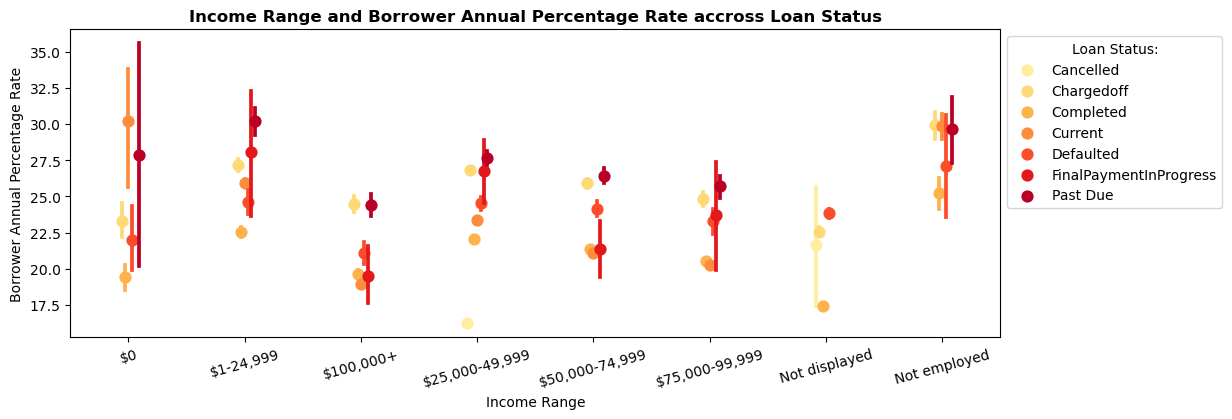

In [224]:
plt.figure(figsize = [12, 4])
ax=sb.pointplot(data=loan_n,x='Income Range',y = 'BorrowerAPR_percent' ,hue='Loan Status' ,
                palette='YlOrRd',linestyles="",dodge=True)
ax.set_yticklabels([],minor=True)
plt.legend(title='Loan Status:',bbox_to_anchor=(1,1),loc="upper left")
plt.title('Income Range and Borrower Annual Percentage Rate accross Loan Status',weight='bold')
plt.ylabel('Borrower Annual Percentage Rate')
plt.xlabel('Income Range')
plt.xticks(rotation=15);

#### We find that the highest Borrower Annual Percentage Rate for each income range is `past due`

### Q20: What is Loan Original Amount and Borrower Annual Percentage Rate across Loan Status?

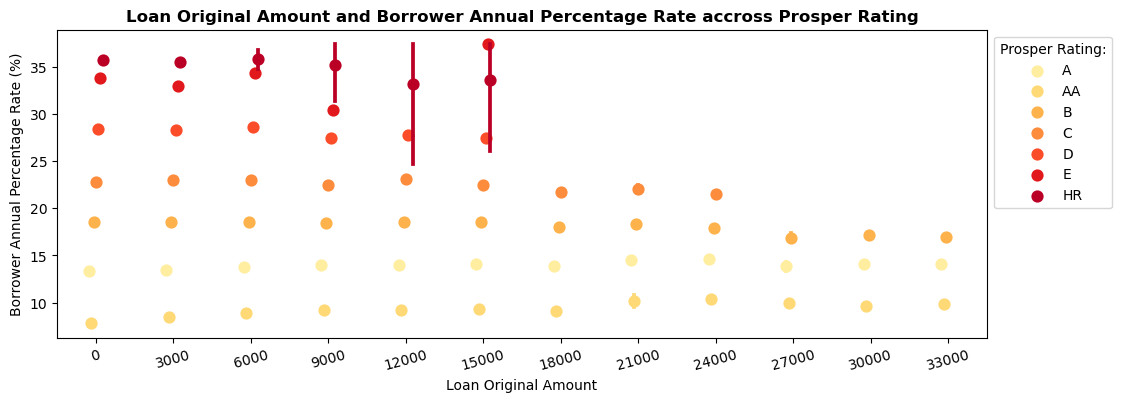

In [225]:
plt.figure(figsize = [12, 4])
ax=sb.pointplot(data=loan_n,x='Loan Amount',y = 'BorrowerAPR_percent' ,hue='Prosper Rating' ,
                palette='YlOrRd',linestyles="",dodge=True)
ax.set_yticklabels([],minor=True)
plt.legend(title='Prosper Rating:',bbox_to_anchor=(1,1),loc="upper left")
plt.title('Loan Original Amount and Borrower Annual Percentage Rate accross Prosper Rating',weight='bold')
plt.ylabel('Borrower Annual Percentage Rate (%)')
plt.xlabel('Loan Original Amount')
plt.xticks(rotation=15);

#### We find highest risk rating in high Borrower Annual Percentage Rate

### Q21: What is the relationship between Loan Original Amount and Investors and Borrower Annual Percentage Rate?

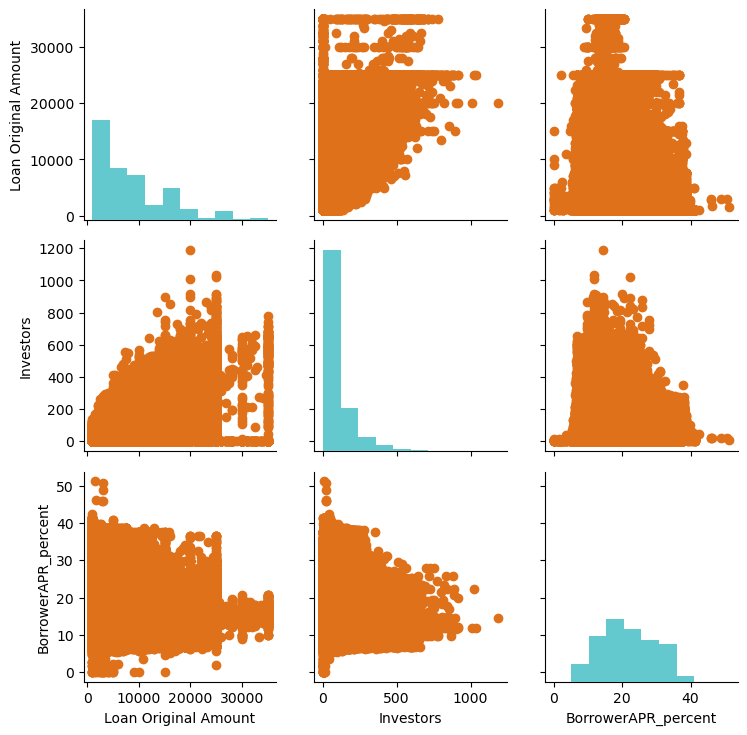

In [226]:
g = sb.PairGrid(data = loan_n, vars = ['Loan Original Amount', 'Investors',
                                       'BorrowerAPR_percent'],palette='Oranges')
g.map_diag(plt.hist,color='#64C9CF')
g.map_offdiag(plt.scatter,color='#DF711B');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> In the relationship between Loan Original Amount and Borrower Annual Percentage Rate across Term We find that the highest Borrower Annual Percentage Rate is for the less the Loan Original Amount.

> In the relationship Loan Original Amount and Borrower Annual Percentage Rate across Loan Status

### Were there any interesting or surprising interactions between features?

> In the relationship between the Income Range and Borrower Annual Percentage Rate across Loan Status We find that the highest Borrower Annual Percentage Rate for each income range is `past due`

## Conclusions

> • The most percentage in Borrower Annual Percentage Rate is 20%.

> • The most length of the loan is 36 months with 77%.

> • The most status of the loan is Current with 49%.

> • The most employment status of the borrowers is employed with 60% then full-time with 23%.

> • 50% of category of the listing that the borrower selected is Debt Consolidation.

> • Most investors under 100.

> • 50% are borrowers homeowner and 50% are borrowers not homeowner.

> • The most income range is 25,000-49,999 with 28% then 50,000-74,999 with 27%.

> • The most loan original amount is 5.000 then 15.000 and 10.000.

> • The most monthly loan payment between is `$` 100 and `$`400.

> • The most quarter is the fourth quarter of 2013 with 12.4%, then the first quarter of 2014 with 10.4%.

> • The lower the loan amount is the higher the Borrower Annual Percentage Rate.

> • The most loan original amount less than of 5000 `$` with less than 100 investors.

> • The higher the range income is the higher the loan amount and people with low incomes and those who have no income cannot borrow loans in high amounts.

> • The 36 term is the most frequent, and we find that most of the borrowers are employed in the 36 term.

> • Most states don't have any loans before this time.

> • The height values in open credit lines are for employed and self-employed.

> • The highest Borrower Annual Percentage Rate is for the less the Loan Original Amount with 60 months.

> • The highest risk rating in high Borrower Annual Percentage Rate.

> • The highest Borrower Annual Percentage Rate for each income range is past due


### Resources:
    https://www.adamsmith.haus/python/answers/how-to-print-an-entire-pandas-dataframe-in-python
    https://matplotlib.org/stable/tutorials/colors/colormaps.html#classes-of-colormaps
    https://www.geeksforgeeks.org/matplotlib-pyplot-hist2d-in-python/
    https://stackoverflow.com/questions/57417970/how-to-set-custom-colors-on-a-count-plot-in-seaborn
    https://seaborn.pydata.org/generated/seaborn.PairGrid.html
    https://seaborn.pydata.org/tutorial/color_palettes.html
    https://www.doughroller.net/resources/reviews/prosper-review/